# importig the important libraries that we are going to use in the program!


In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
os.getcwd()

'/content'

# importing the csv file for working  and reading the data



In [2]:
os.getcwd()
Mdata=pd.read_csv("Churn1.csv")

In [3]:
Mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#copying the oregional set of data inanother variable 
data=Mdata.copy(deep=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Cleaning the data and looking for the missing values

In [6]:
#looking at the above description we see that there are less values in TotalCharges column  which means there are some missing values.
#check for the missing values in the data frame.
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#checking and filling out the missing values in the TotalCharges column.
print(np.unique(data['TotalCharges']))
x=data['TotalCharges'].mean()
print(x)
#replacing nan with the mean values 
data['TotalCharges']=data['TotalCharges'].replace(np.nan,x)
#check the unique values of TotalCharges column 
print(np.unique(data['TotalCharges']))

[18.8  18.85 18.9  ...   nan   nan   nan]
2283.3004408418697
[  18.8    18.85   18.9  ... 8670.1  8672.45 8684.8 ]


In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#manipulating the data for visualization ...converting them into binary forms 

data_col=data.columns
data_col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
le = preprocessing.LabelEncoder()
for i in data_col:
    data[i]=le.fit_transform(data[i])

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


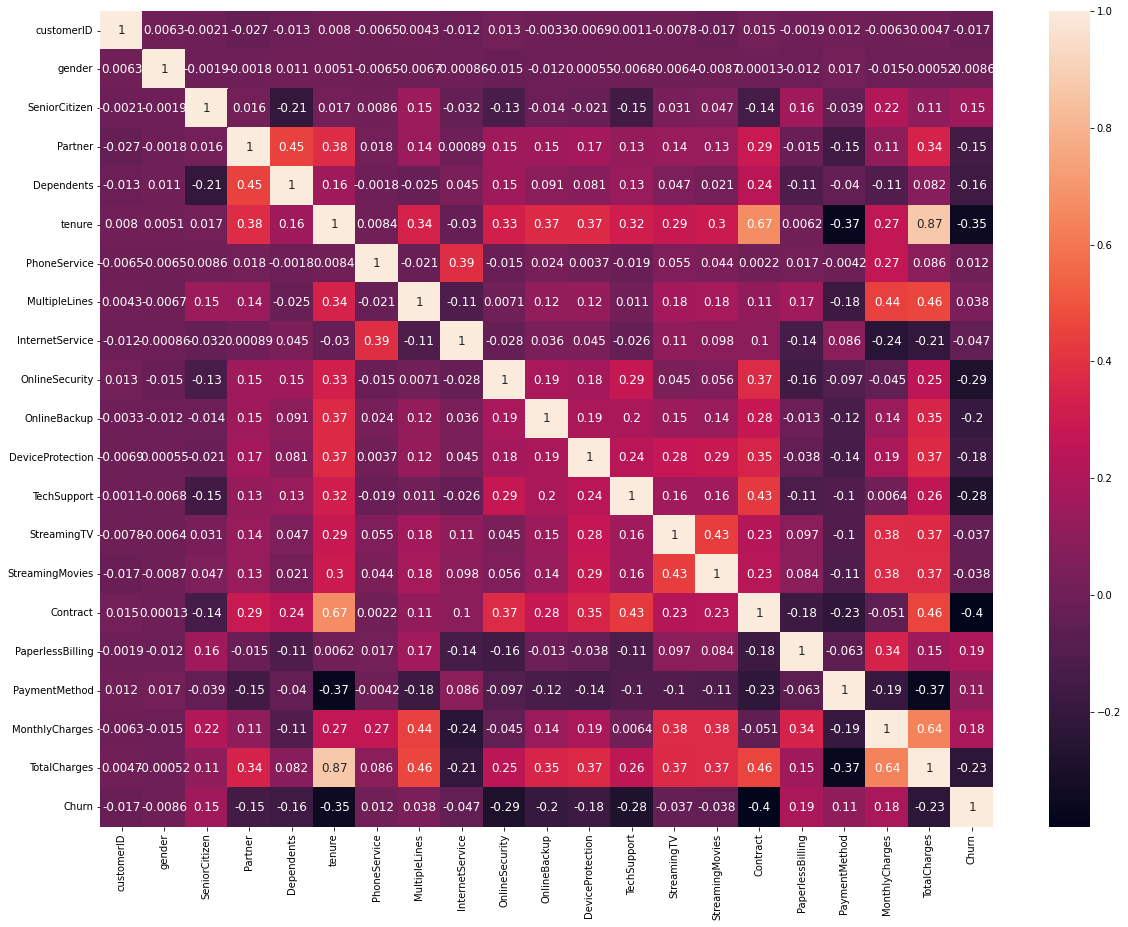

In [12]:
#after conversion , now trying to visualse the corelations and the trends formed by the data 
#figuring out the relation between the coustomer data and churn
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [16]:
#as the TotalCharge and the gender column are not Churn are not closely corelated we can drop the column 
#even there is a column for MonthlyCharges which means the TotalCharge column is not going to affect the Churn so mouch
#data=data.drop(columns='TotalCharges')

In [17]:
data= data.drop(columns='gender')

In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

# Exploring the data


In [19]:
#lets see how many data points are there in the Churn 
print(len(data['Churn']))

7043


In [20]:
#figuring out the exact value of customers churned from the company 
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

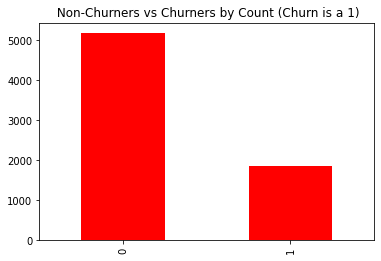

In [21]:
data['Churn'].value_counts().plot(kind = 'bar', title = ' Non-Churners vs Churners by Count (Churn is a 1)', color = 'red', align = 'center')
plt.show()

In [22]:
#finding the relation ship betwween other instances and the data of Churn 


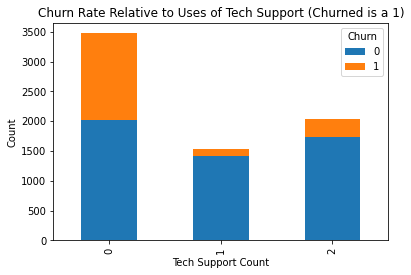

In [23]:
# Finding the relationship between instances of Tech Support and Churn. 
# Stacked Bar of Tech Support and Churn.
tech_support_churn = pd.crosstab(data['TechSupport'], data['Churn'])
tech_support_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tech Support Count')
plt.title('Churn Rate Relative to Uses of Tech Support (Churned is a 1)')
plt.show()
#in x lable the tech support count - 0 =No, 1= No internet service and 2= Yes  
#by looking at the graph below we can figure out that, the people who use tech support are less lickely to be Churner 

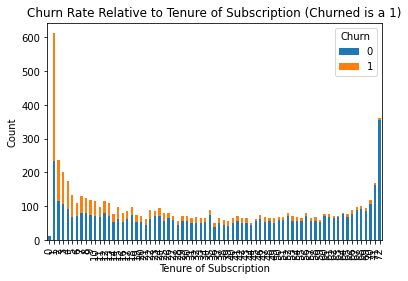

In [24]:
# Churn rate relative to tenure.
# Stacked bar of tenure and churn.
tenure_churn = pd.crosstab(data['tenure'], data['Churn'])
tenure_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tenure of Subscription')
plt.title('Churn Rate Relative to Tenure of Subscription (Churned is a 1)')
plt.show()
# We can see that long term subscribers are less lickly to be a cherner 

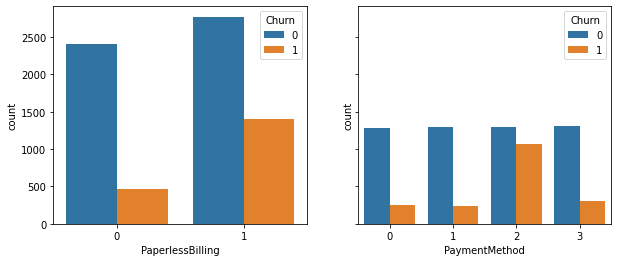

In [25]:
# Looking at the relation beteew , how the customer pays column with the churn column.
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.countplot(x='PaperlessBilling', hue='Churn',
              data=data, ax=axes[0]);
sns.countplot(x='PaymentMethod', hue='Churn',
              data=data, ax=axes[1]);
# We can see that customers that use paperless billing are much more likely to churn (0 = don't have paperless billing). That seems backwards I would go check that data with the team.
# We can see that customers that have the 0 payment method (electronic check) are much more likely to churn. Let's discourage that option.

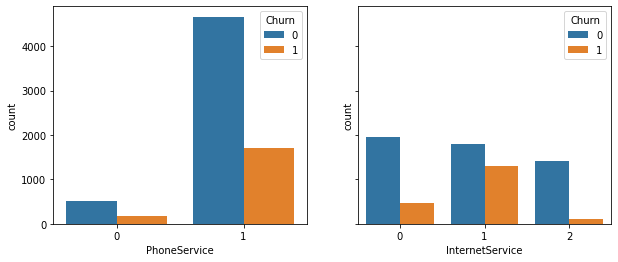

In [26]:
# See if the other products they have from this company has to do with their churn.
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.countplot(x='PhoneService', hue='Churn',
              data=data, ax=axes[0]);
sns.countplot(x='InternetService', hue='Churn',
              data=data, ax=axes[1]);
# If they don't have Phone Service, they are more likely to churn.
# If they don't have Internet Service, they are more likely to churn. Those customers with the highest Internet Service are least likely to churn.
# Conclusion: This makes sense. Customers with other products from the company, and premium products, churn less.
# Offer customers these additional products, perhaps even at a deep discount, so they take them and are less likely to churn. 

In [27]:
#preparing the data and fitting the test and train data
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,5375,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,0
1,3962,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,0
2,2564,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,1
3,5535,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,0
4,6511,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,1


In [28]:
y=data.iloc[:,-1]
X=data.iloc[:,0:-1]

In [29]:
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
features = fit.transform(X)
features

array([[5375,    1,    0,  142],
       [3962,   34,    1,  498],
       [2564,    2,    0,  436],
       ...,
       [3367,   11,    0,  137],
       [5934,    4,    0,  795],
       [2226,   66,    2, 1388]])

In [30]:

print(features[0:5,:])

[[5375    1    0  142]
 [3962   34    1  498]
 [2564    2    0  436]
 [5535   45    1  266]
 [6511    2    0  729]]


In [31]:

np.set_printoptions(precision=3) 
print(fit.scores_)

[2.517e+03 1.344e+02 8.241e+01 1.330e+02 1.628e+04 9.726e-02 9.747e+00
 9.821e+00 5.516e+02 2.301e+02 1.913e+02 5.233e+02 7.490e+00 8.235e+00
 1.116e+03 1.057e+02 5.849e+01 7.945e+04]


In [32]:
c=['Partner','InternetService', 'OnlineSecurity',
       'OnlineBackup','TechSupport',
       'Contract','PaymentMethod','tenure']

In [33]:
x=data.loc[:,c]
scaler = StandardScaler()
X=scaler.fit_transform(X)
x=scaler.fit_transform(x)

In [34]:
X

array([[ 0.912, -0.44 ,  1.035, ...,  0.83 ,  0.399, -1.132],
       [ 0.217, -0.44 , -0.967, ..., -1.205,  1.335, -0.388],
       [-0.471, -0.44 , -0.967, ...,  0.83 ,  1.335, -0.517],
       ...,
       [-0.076, -0.44 ,  1.035, ...,  0.83 ,  0.399, -1.142],
       [ 1.187,  2.273,  1.035, ...,  0.83 ,  1.335,  0.233],
       [-0.637, -0.44 , -0.967, ...,  0.83 , -1.474,  1.472]])

# Implementing the Machine Learning Models


In [35]:
#APPLYING MODELS ON UNBALENCED CLASS DATA
#LOGISTIC
f1 = []
acc=[]
n = 150
print("Logistic:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    lr.fit(X_train, y_train)
    ypred=lr.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Logistic:
Avg F1-Score 0.7956124821254764
Max F1-Score 0.8130383350662247
Min F1-Score 0.7790191568530187
Avg Accuracy 0.80193721407162
Max Accuracy 0.8177946048272599
Min Accuracy 0.7841930903928065


In [36]:
#RANDOM FOREST
n = 50
print("Random Forest:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    rf.fit(X_train, y_train)
    ypred=rf.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Random Forest:
Avg F1-Score 0.792709232159313
Max F1-Score 0.8130383350662247
Min F1-Score 0.7616064488972628
Avg Accuracy 0.7998028040952339
Max Accuracy 0.8177946048272599
Min Accuracy 0.7743080198722498


accuracy:   78.779
[[935 110]
 [189 175]]


Text(25.5, 0.5, 'true values')

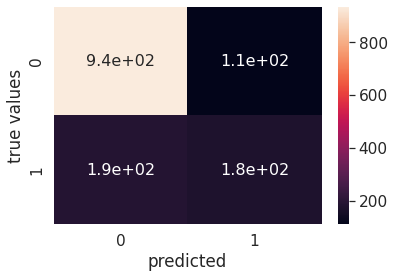

In [37]:
#RANDOM FOREST accuracy check 
score = metrics.accuracy_score(y_test, ypred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, ypred, labels=[0,1])
print(cm)
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})
#sns.set_axis_labels('true values','predicted')
plt.xlabel("predicted")
plt.ylabel("true values")

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,ypred)
print('AUC: %.3f' % auc)

AUC: 0.688


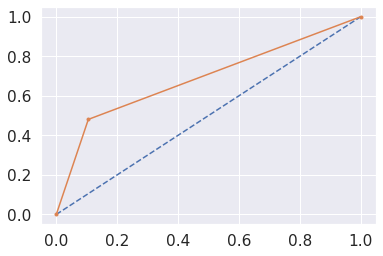

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [40]:
# after crating and chacking for two models The Random Forest modeal is the best fit for the case(dataset)
#the Accuracy score is near to 81% and the AUC is near to 71%

In [41]:
#Some more parametre tunning can help the model to reach higher accuracy and perform better


''''''
Summary
Looking at model results, the best accuracy on the test set is achieved by the RANDOM FOREST with 80.696%. Given the high imbalance of the data towards non-churners, it makes sense to compare severel features of the dataset to figure out the relations with Churners.

Hypotheses and the key factors that predict the churn -
Looking at the evaluation results, specifically the feature weights from the logistic regression, the hypotheses can be directionally supported or refused:
Contract duration: Contract duration month-to-month is the second biggest driver of churn → supported
Number of additional services: This feature does not rank among the top features → refused
Tenure: High tenure ranks as the strongest factor for not churning and the strongest feature overall. This is also supported by the boxplot in the EDA step. → supported
Monthly payment: Total payments, which is the product of tenure and monthly payment ranks as the strongest factor for churn. Indirectly, high monthly payments lead to churn. However, tenure is the highest driver of not churning → refused
 
 And so on there are other features that influenced the results.
 But at the same time there were some of the features that had no or less impact on the number of churners for example CustomerID, TotalCharges,Gender 
    ''''''
    
 #The variables are selected by looking at the corelation between the dependent variable and the independent factors.
 #The key factors are responsible for the trend in the coustomer churn.
 #Get more data. This is only ~7k records , for making the best fit model more data is required for traing and testing purpose.
 #Get more detailed data on features that are showing to be relatively MORE predictive:
 #MonthlyCharges
 #Tenure
 #PaymentMethod
 #Plan Types
 #Get more detailed data on features that are showing to be relatively LESS predictive but our analysis show with more details   #they could be really useful
